In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car_data=pd.read_csv("train.csv")

In [3]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
car_data["is_esc"]=car_data["is_esc"].map({"Yes":1,"No":0})
car_data["is_adjustable_steering"]=car_data["is_adjustable_steering"].map({"Yes":1,"No":0})
car_data["is_tpms"]=car_data["is_tpms"].map({"Yes":1,"No":0})
car_data["is_parking_sensors"]=car_data["is_parking_sensors"].map({"Yes":1,"No":0})
car_data["is_parking_camera"]=car_data["is_parking_camera"].map({"Yes":1,"No":0})
car_data["is_front_fog_lights"]=car_data["is_front_fog_lights"].map({"Yes":1,"No":0})
car_data["is_rear_window_wiper"]=car_data["is_rear_window_wiper"].map({"Yes":1,"No":0})
car_data["is_rear_window_washer"]=car_data["is_rear_window_washer"].map({"Yes":1,"No":0})
car_data["is_rear_window_defogger"]=car_data["is_rear_window_defogger"].map({"Yes":1,"No":0})
car_data["is_brake_assist"]=car_data["is_brake_assist"].map({"Yes":1,"No":0})
car_data["is_power_door_locks"]=car_data["is_power_door_locks"].map({"Yes":1,"No":0})
car_data["is_central_locking"]=car_data["is_central_locking"].map({"Yes":1,"No":0})
car_data["is_power_steering"]=car_data["is_power_steering"].map({"Yes":1,"No":0})
car_data["is_driver_seat_height_adjustable"]=car_data["is_driver_seat_height_adjustable"].map({"Yes":1,"No":0})
car_data["is_day_night_rear_view_mirror"]=car_data["is_day_night_rear_view_mirror"].map({"Yes":1,"No":0})
car_data["is_ecw"]=car_data["is_ecw"].map({"Yes":1,"No":0})
car_data["is_speed_alert"]=car_data["is_speed_alert"].map({"Yes":1,"No":0})
car_data["rear_brakes_type"]=car_data["rear_brakes_type"].map({"Drum":1,"Disc":0})
car_data["steering_type"]=car_data["steering_type"].map({"Power":1,"Electric":2,"Manual":0})
car_data["transmission_type"]=car_data["transmission_type"].map({"Automatic":1,"Manual":0})
car_data["fuel_type"]=car_data["fuel_type"].map({"Petrol":1,"CNG":2,"Diesel":0})


In [5]:
objects=["area_cluster","segment","model","max_torque","max_power","engine_type"]
for i in objects:
    car_data[i]=car_data[i].astype("category")

for i in objects:
    car_data[f"{i}_new"]=car_data[i].cat.codes

from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(car_data[["segment_new","area_cluster_new","model_new","max_torque_new","max_power_new","engine_type_new"]]))

new_df=car_data.join(enc_data)
corr=new_df.corr(numeric_only=True)
new_df=new_df.drop(["area_cluster","segment","model","max_torque","max_power","engine_type","policy_id",0],axis=1)
y=new_df["is_claim"]
X=new_df.drop("is_claim",axis=1)
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   population_density                58592 non-null  int64  
 4   make                              58592 non-null  int64  
 5   fuel_type                         58592 non-null  int64  
 6   airbags                           58592 non-null  int64  
 7   is_esc                            58592 non-null  int64  
 8   is_adjustable_steering            58592 non-null  int64  
 9   is_tpms                           58592 non-null  int64  
 10  is_parking_sensors                58592 non-null  int64  
 11  is_parking_camera                 58592 non-null  int64  
 12  rear

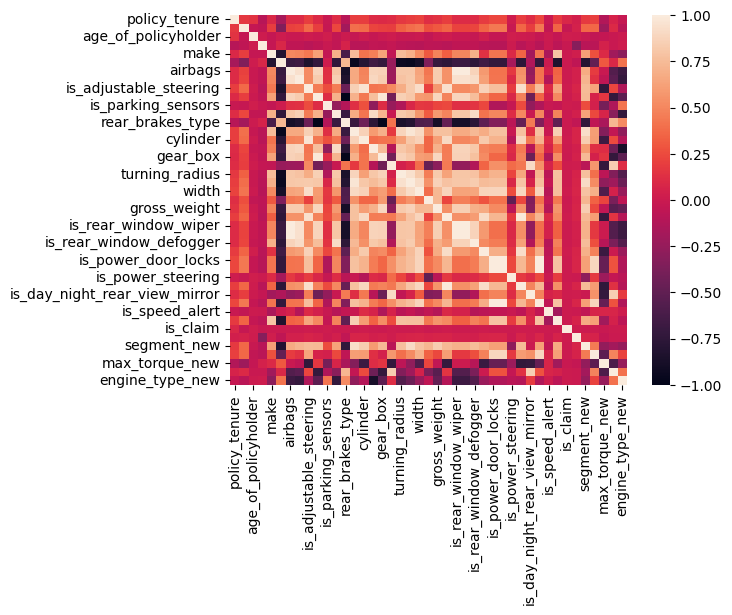

In [6]:
sns.heatmap(new_df.corr(numeric_only=True),cbar=True)
plt.show()

In [7]:
print(pd.crosstab(car_data["engine_type"],car_data["is_claim"],normalize='index'))

is_claim                          0         1
engine_type                                  
1.0 SCe                    0.946060  0.053940
1.2 L K Series Engine      0.931633  0.068367
1.2 L K12N Dualjet         0.925926  0.074074
1.5 L U2 CRDi              0.935725  0.064275
1.5 Turbocharged Revotorq  0.927409  0.072591
1.5 Turbocharged Revotron  0.958678  0.041322
F8D Petrol Engine          0.938587  0.061413
G12B                       0.939620  0.060380
K Series Dual jet          0.931838  0.068162
K10C                       0.941529  0.058471
i-DTEC                     0.937086  0.062914


In [8]:
print(pd.crosstab(car_data["airbags"],car_data["is_claim"],normalize='index'))

is_claim         0         1
airbags                     
1         0.939620  0.060380
2         0.936351  0.063649
6         0.935016  0.064984


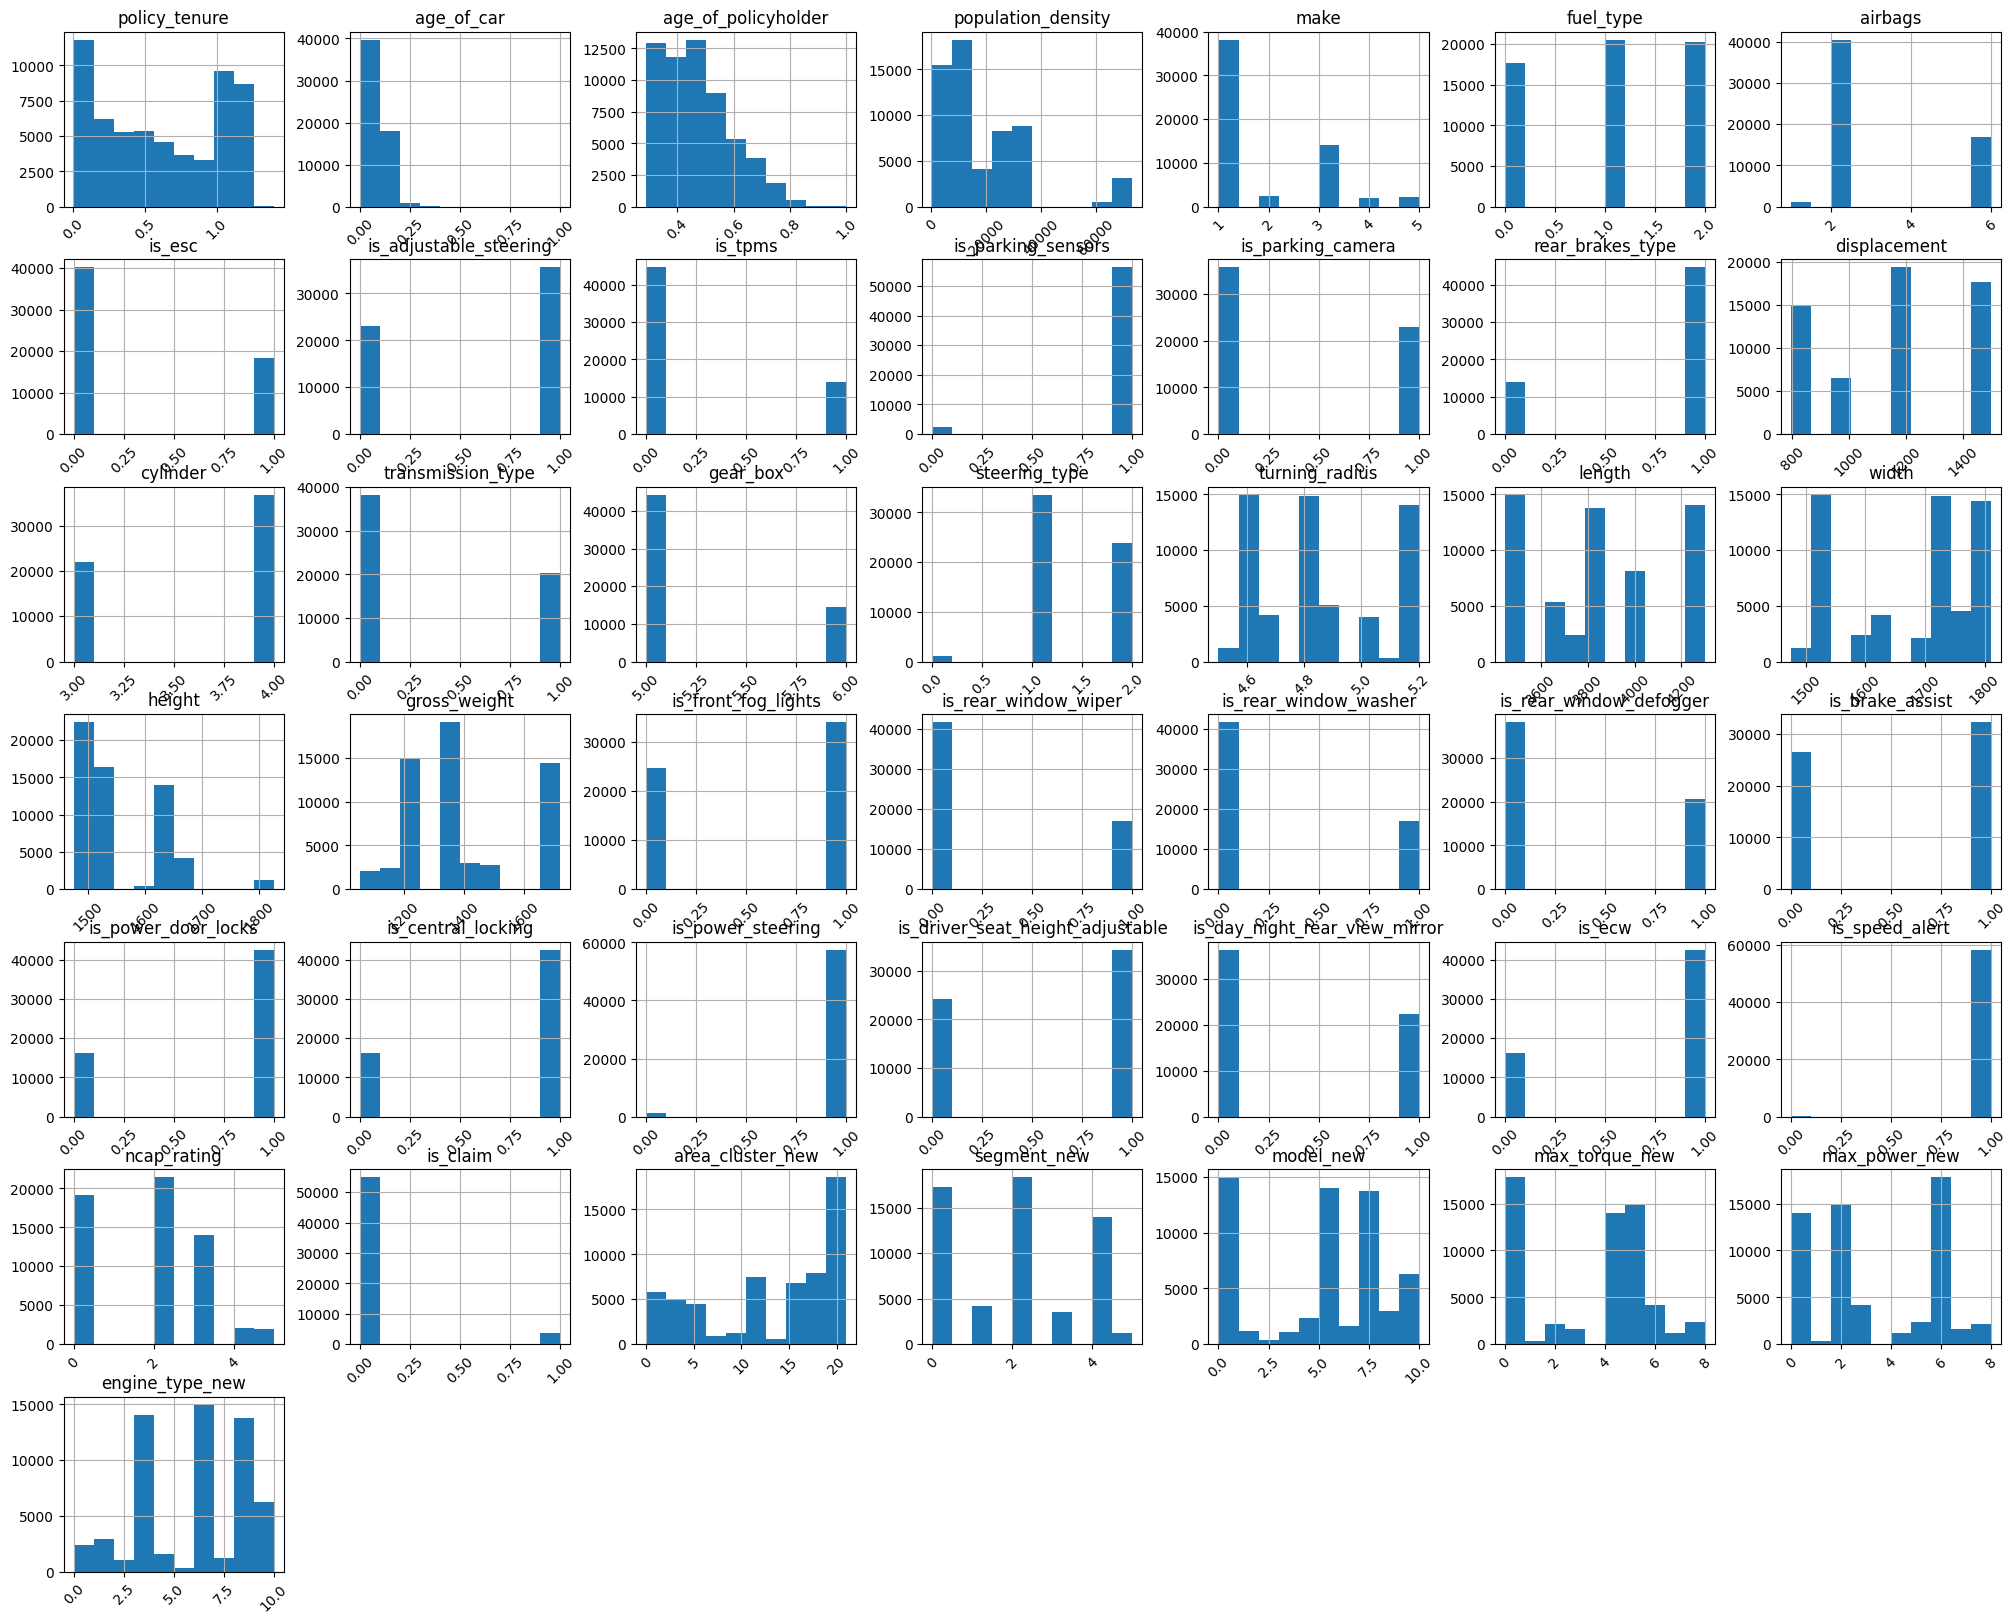

In [9]:
new_df.hist(figsize=(25,20),xrot=45)
plt.show()

In [10]:
print(new_df.describe())

       policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make     fuel_type       airbags        is_esc  \
count  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      1.044375      3.137066      0.314053   
std        1.136988      0.804748      1.832641      0.464142   
min        1.000000      0.0